## Sentiment Analysis of Finincial News 

In [1]:
#data source
#!wget -o news.csv https://www.kaggle.com/shivamburnwal/text-classification-financial-news/data

In [2]:
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

In [4]:
financial_data = pd.read_csv("all_data.csv", encoding='latin-1',names=['sentiment', 'NewsHeadline'])
financial_data

,sentiment,NewsHeadline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


Text(0, 0.5, 'Number of News')

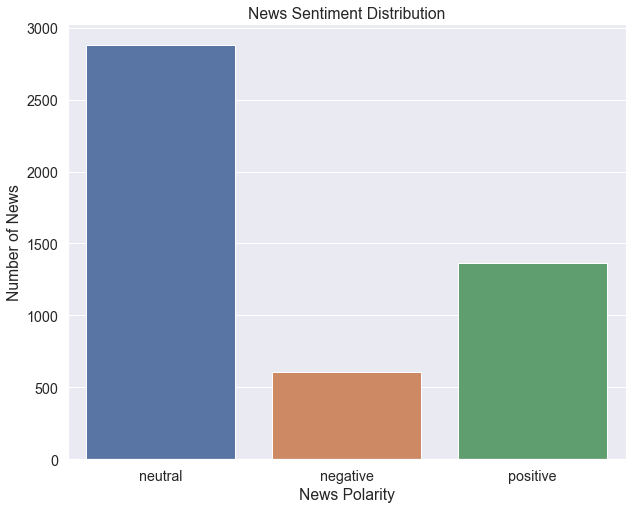

In [5]:
# Configure the plot size
plt.figure(figsize = (10,8))
sns.set(style='darkgrid')    
# Increase information on the figure
sns.set(font_scale=1.3)
sns.countplot(x='sentiment', data = financial_data)
plt.title('News Sentiment Distribution')
plt.xlabel('News Polarity')
plt.ylabel('Number of News')

###  Text Preprocessing

In [6]:
def text_processing(X):
    from nltk.stem import WordNetLemmatizer
    documents = []
    stemmer = WordNetLemmatizer()
    for sen in range(0, len(X)):
        
        # remove all the special characters
        document = re.sub(r'\W', ' ', str(X[sen]))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # remove punctuation
        document = re.sub(r'[^\w\s]','', document)
        
        # remove numbers
        document= re.sub(r'[0-9]+', '', document)
        
        # remove urls
        document = re.sub(r'http\S+', '', document)
        
        # remove html tags
        html_cleaner = re.compile('<.*?>')
        document = re.sub(html_cleaner, '', document)        
        
        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        document = document.split()

        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)
        documents.append(document)
        
    return documents

In [7]:
documents, y = financial_data.NewsHeadline, financial_data.sentiment
x = text_processing(documents)

### Converting text to Numbers using Bag of Words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(x).toarray()

### Finding TFIDF

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

### Test-Train Split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

###  Training data

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =  15)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

### Model Evaluation

In [12]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.67      0.34      0.45       128
     neutral       0.72      0.94      0.82       575
    positive       0.66      0.39      0.49       267

    accuracy                           0.71       970
   macro avg       0.68      0.55      0.58       970
weighted avg       0.70      0.71      0.68       970



In [13]:
accuracy_score(y_test, y_pred)

0.7082474226804124